### TaxiFare.csv
### Problem Statement:To prepare a regression model to predict the amount of the taxiride.
### The goal of this project is to predict with reasonable accuracy, the taxi fares of new york city based on the dataset
### Target: The target column fare_amount is a float dollar amount of the cost of the taxi ride.

In [1]:
### Step 1
### Import the packages numpy,pandas,matplotlib,seaborn,sklearn,train test split,metrics
### Step 2:Load the Dataset
### Step 3:Explore the data-shape,visualisation
### Step 4:X,y-->train data test data->Fit the model with training data  predict with the test data

In [2]:
#Basic and most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
palette = sns.color_palette("rainbow", 8)


%matplotlib inline

In [3]:
#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Model evaluation tools
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv("/content/TaxiFare (3).csv")
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
duplicate=df.duplicated()
duplicate.sum()

0

### Feature Engineering

In [11]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

In [12]:
df['year'] = df.date_time_of_pickup.apply(lambda t: t.year)
df['weekday'] = df.date_time_of_pickup.apply(lambda t: t.weekday())
df['hour'] = df.date_time_of_pickup.apply(lambda t: t.hour)

In [13]:
def distance(lat1, lon1, lat2, lon2):

    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [14]:
df['distance'] = distance(df.latitude_of_pickup, df.longitude_of_pickup, df.latitude_of_dropoff, df.longitude_of_dropoff)

In [15]:
df= df.dropna()

In [16]:
df= df[df.amount  > 0]

In [17]:
df = df[df.distance > 0]

In [18]:
df = df.drop(['unique_id','date_time_of_pickup'], axis=1)

In [19]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218


In [20]:
!pip install autoviz
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
AV = AutoViz_Class()

Output hidden; open in https://colab.research.google.com to view.

Shape of your Data Set loaded: (50000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 15


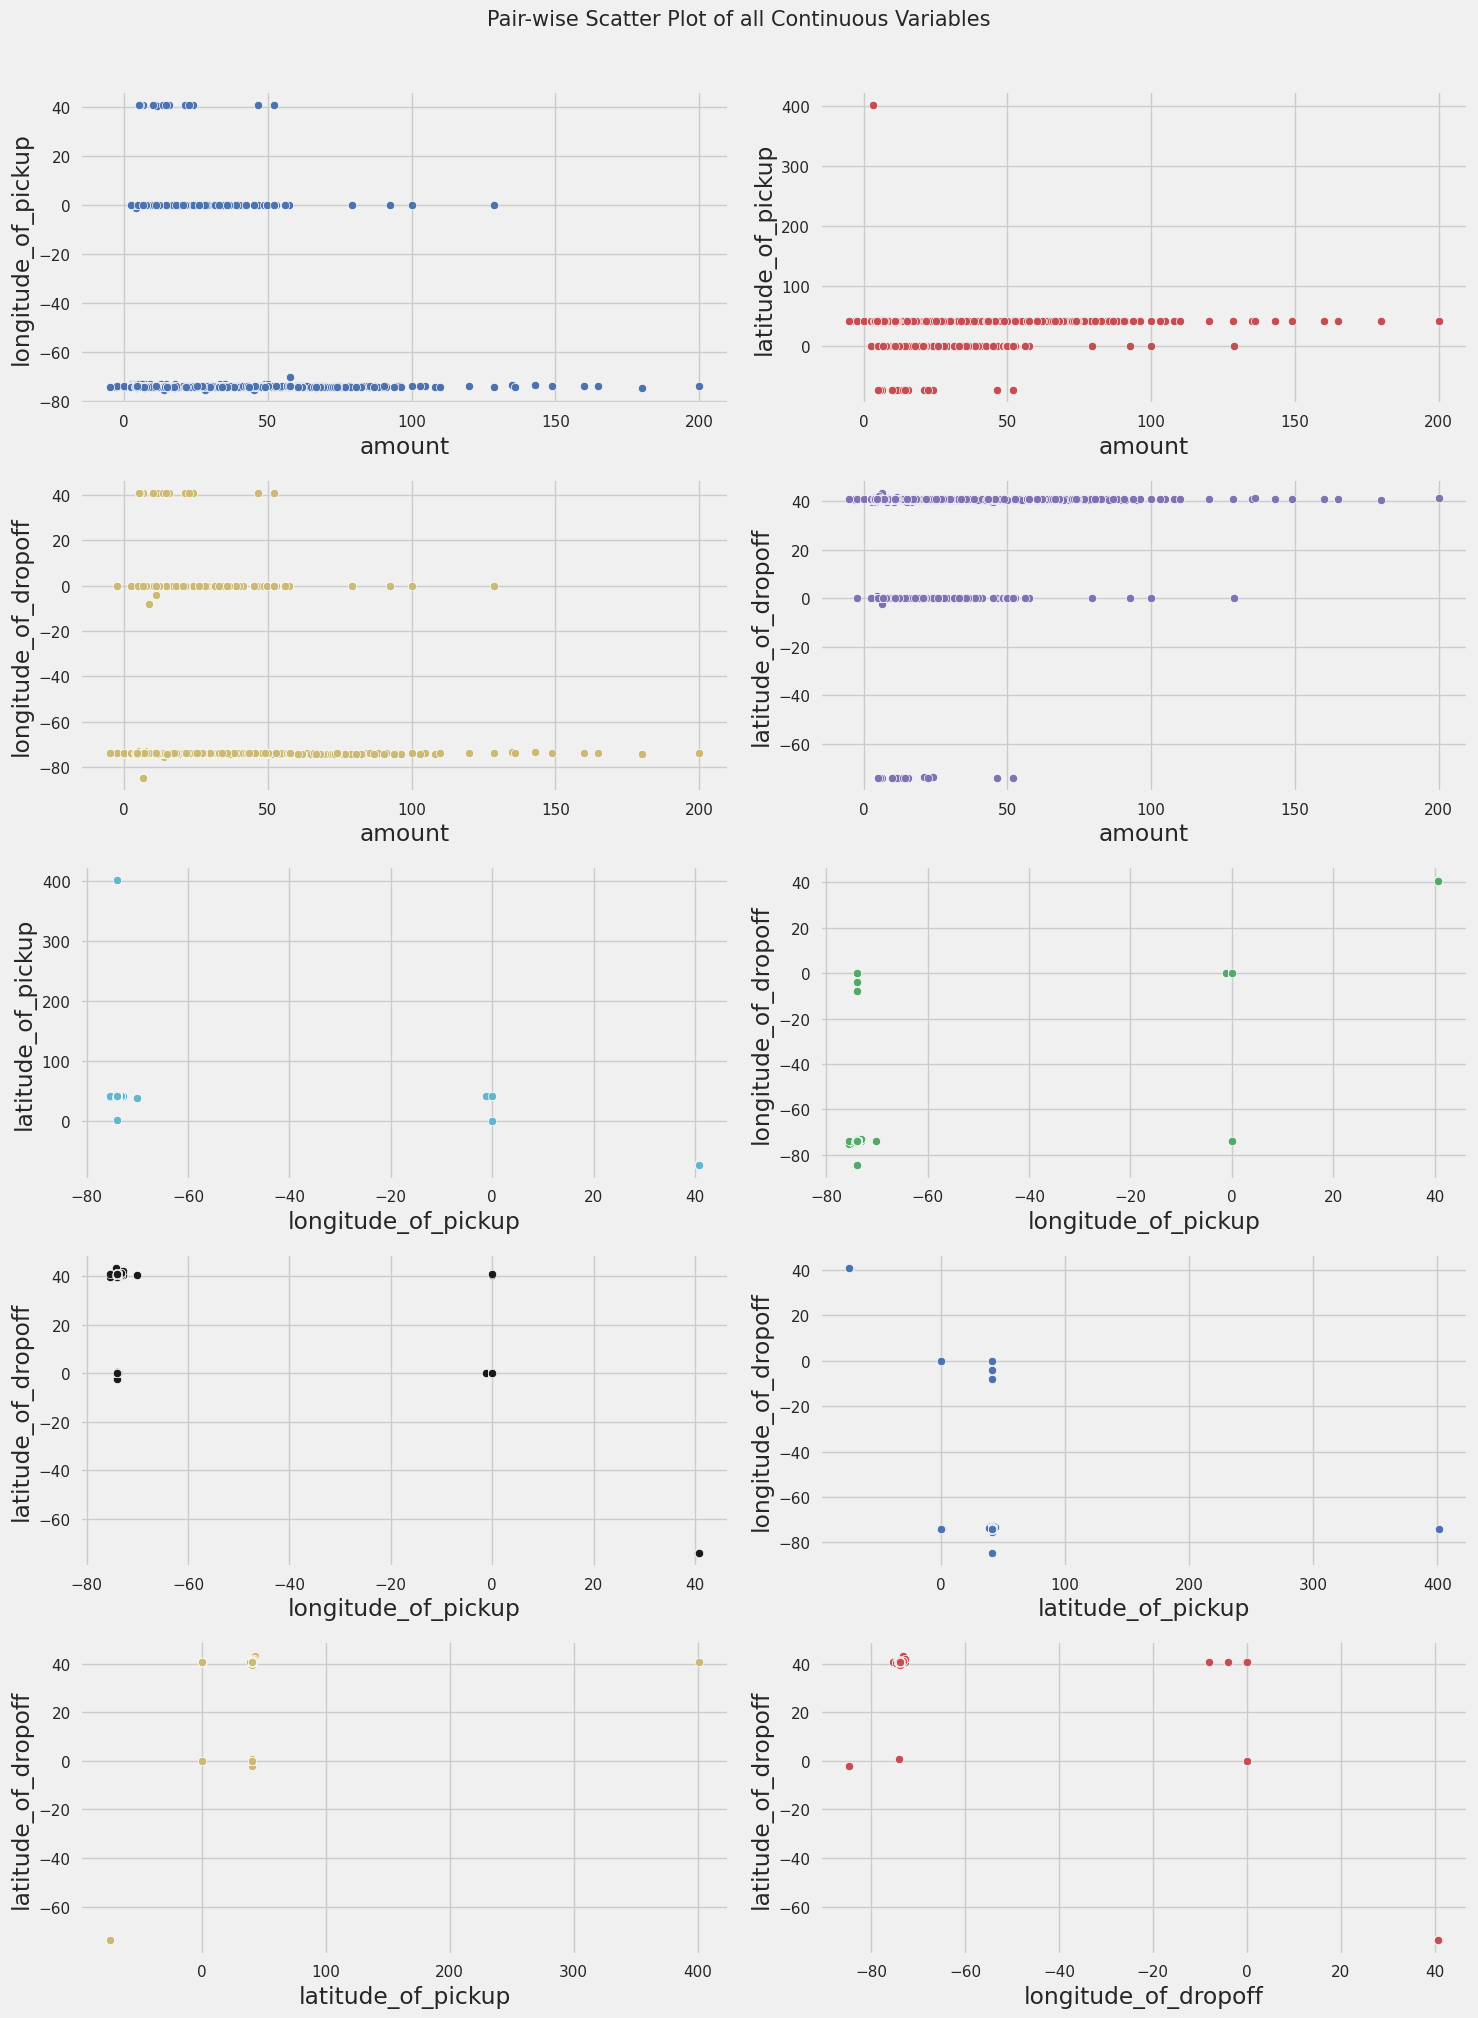

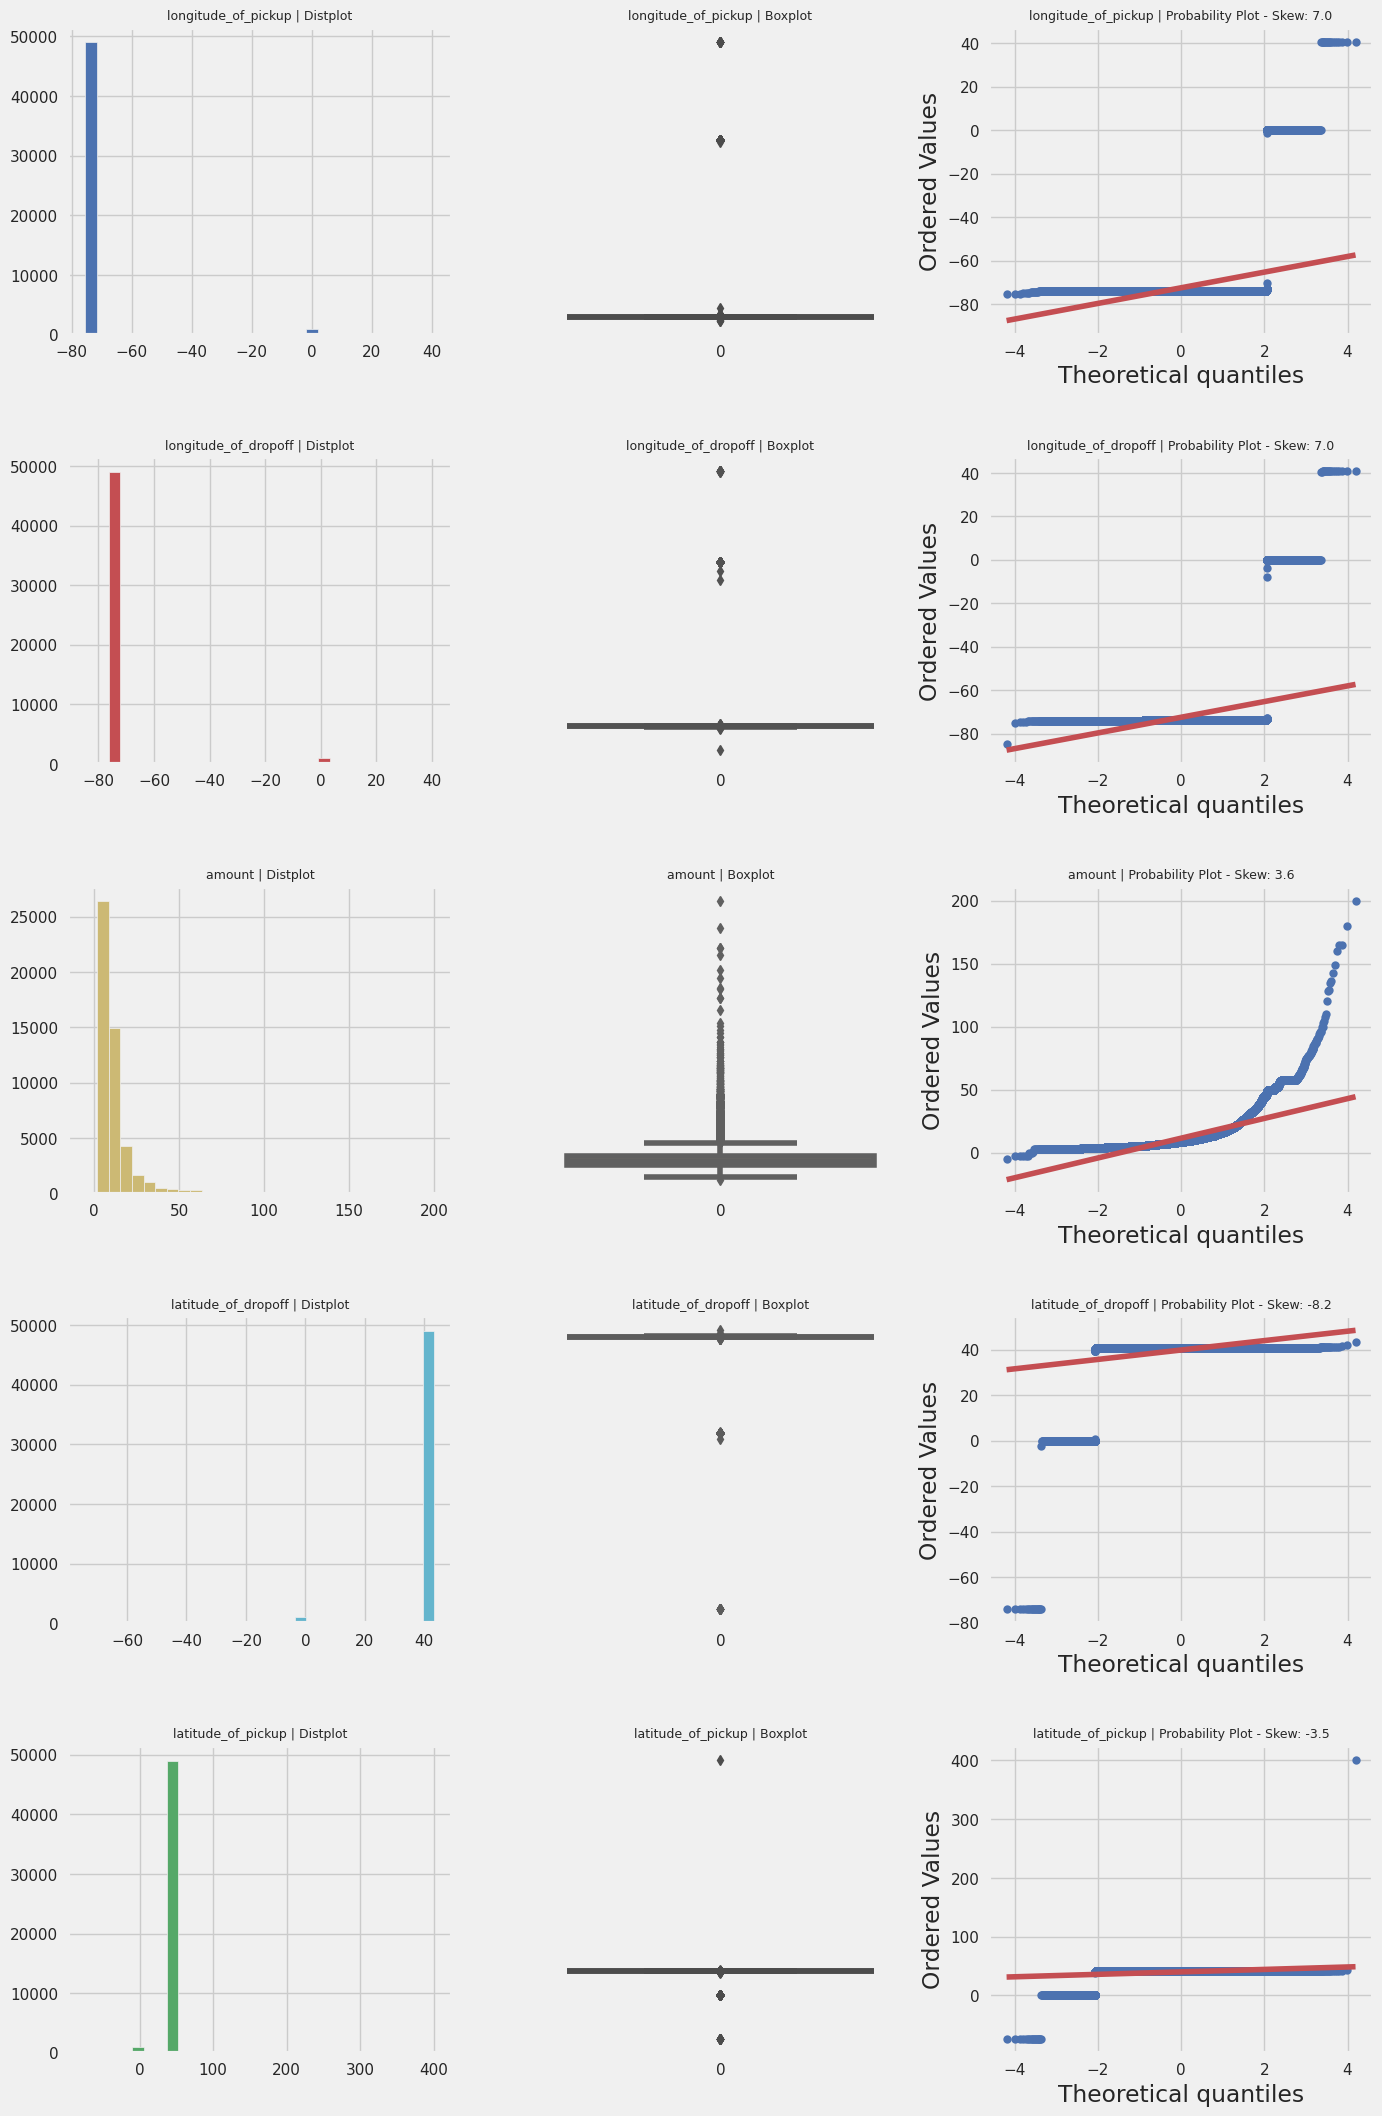

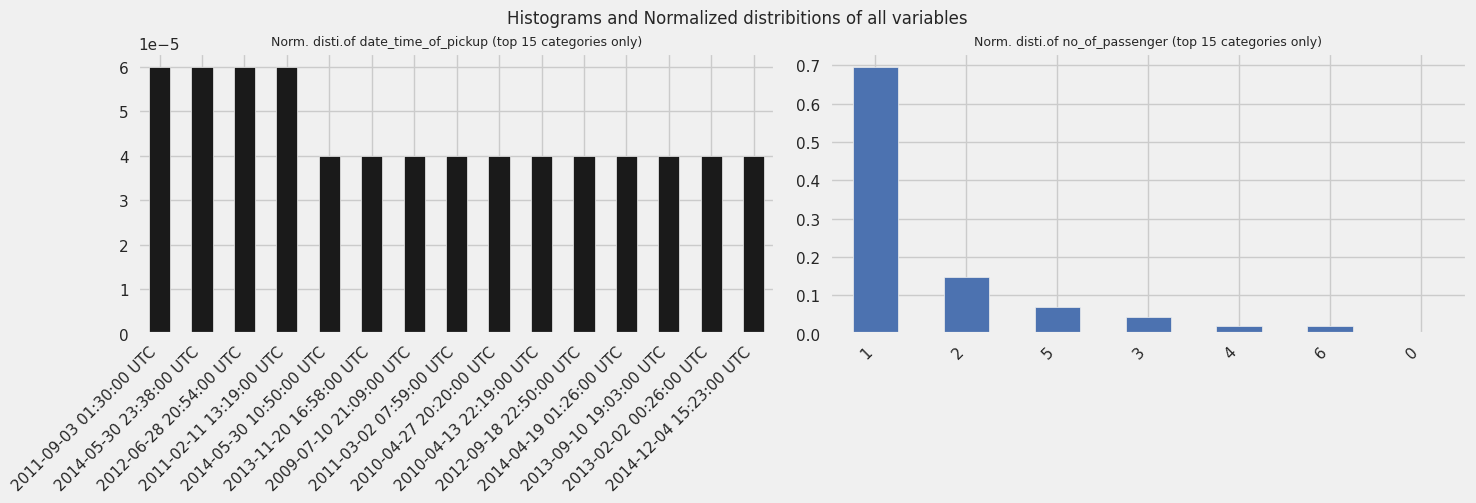

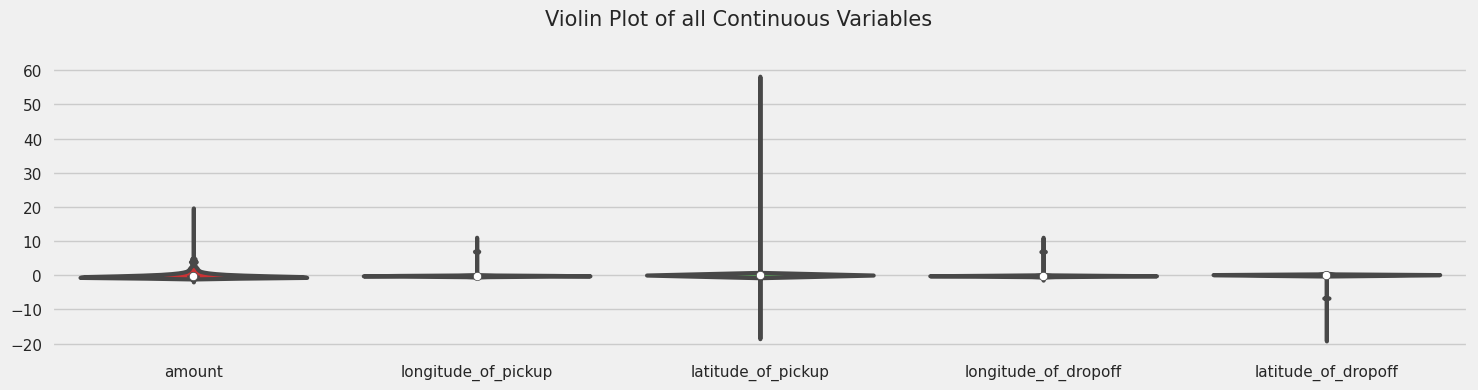

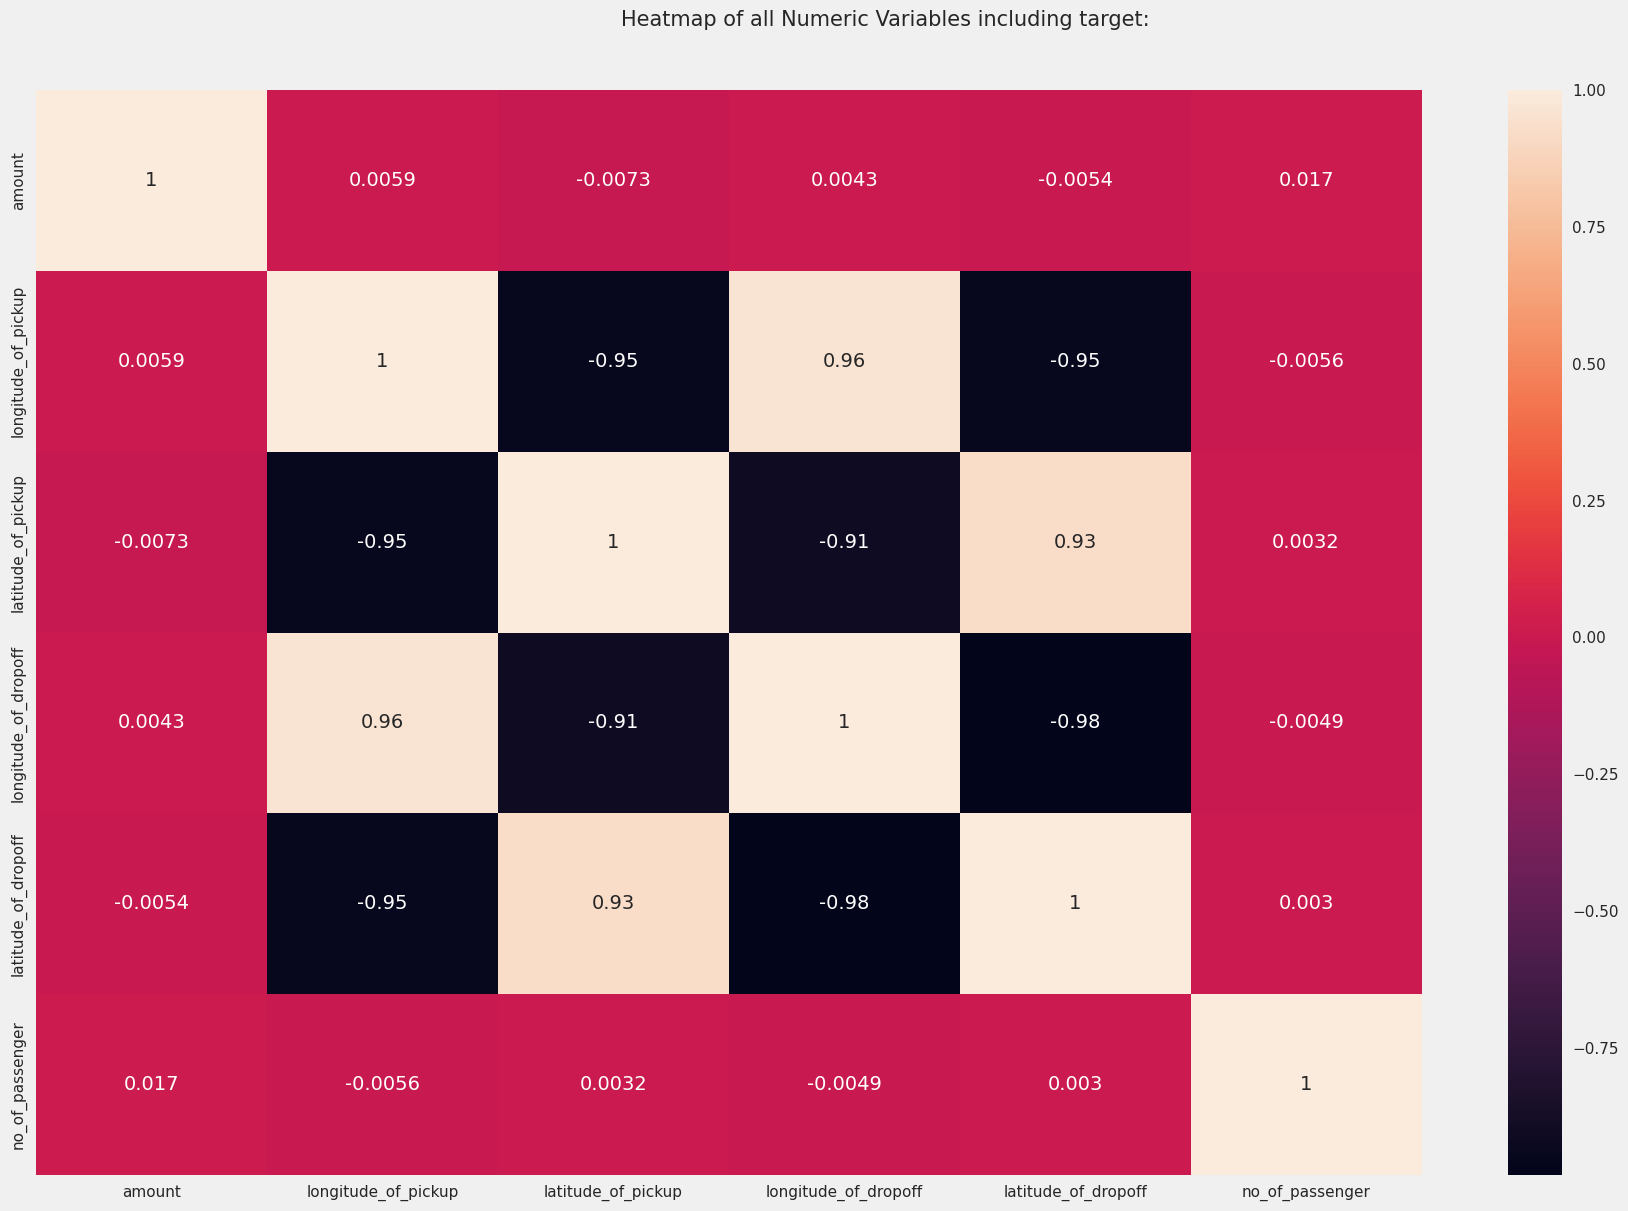

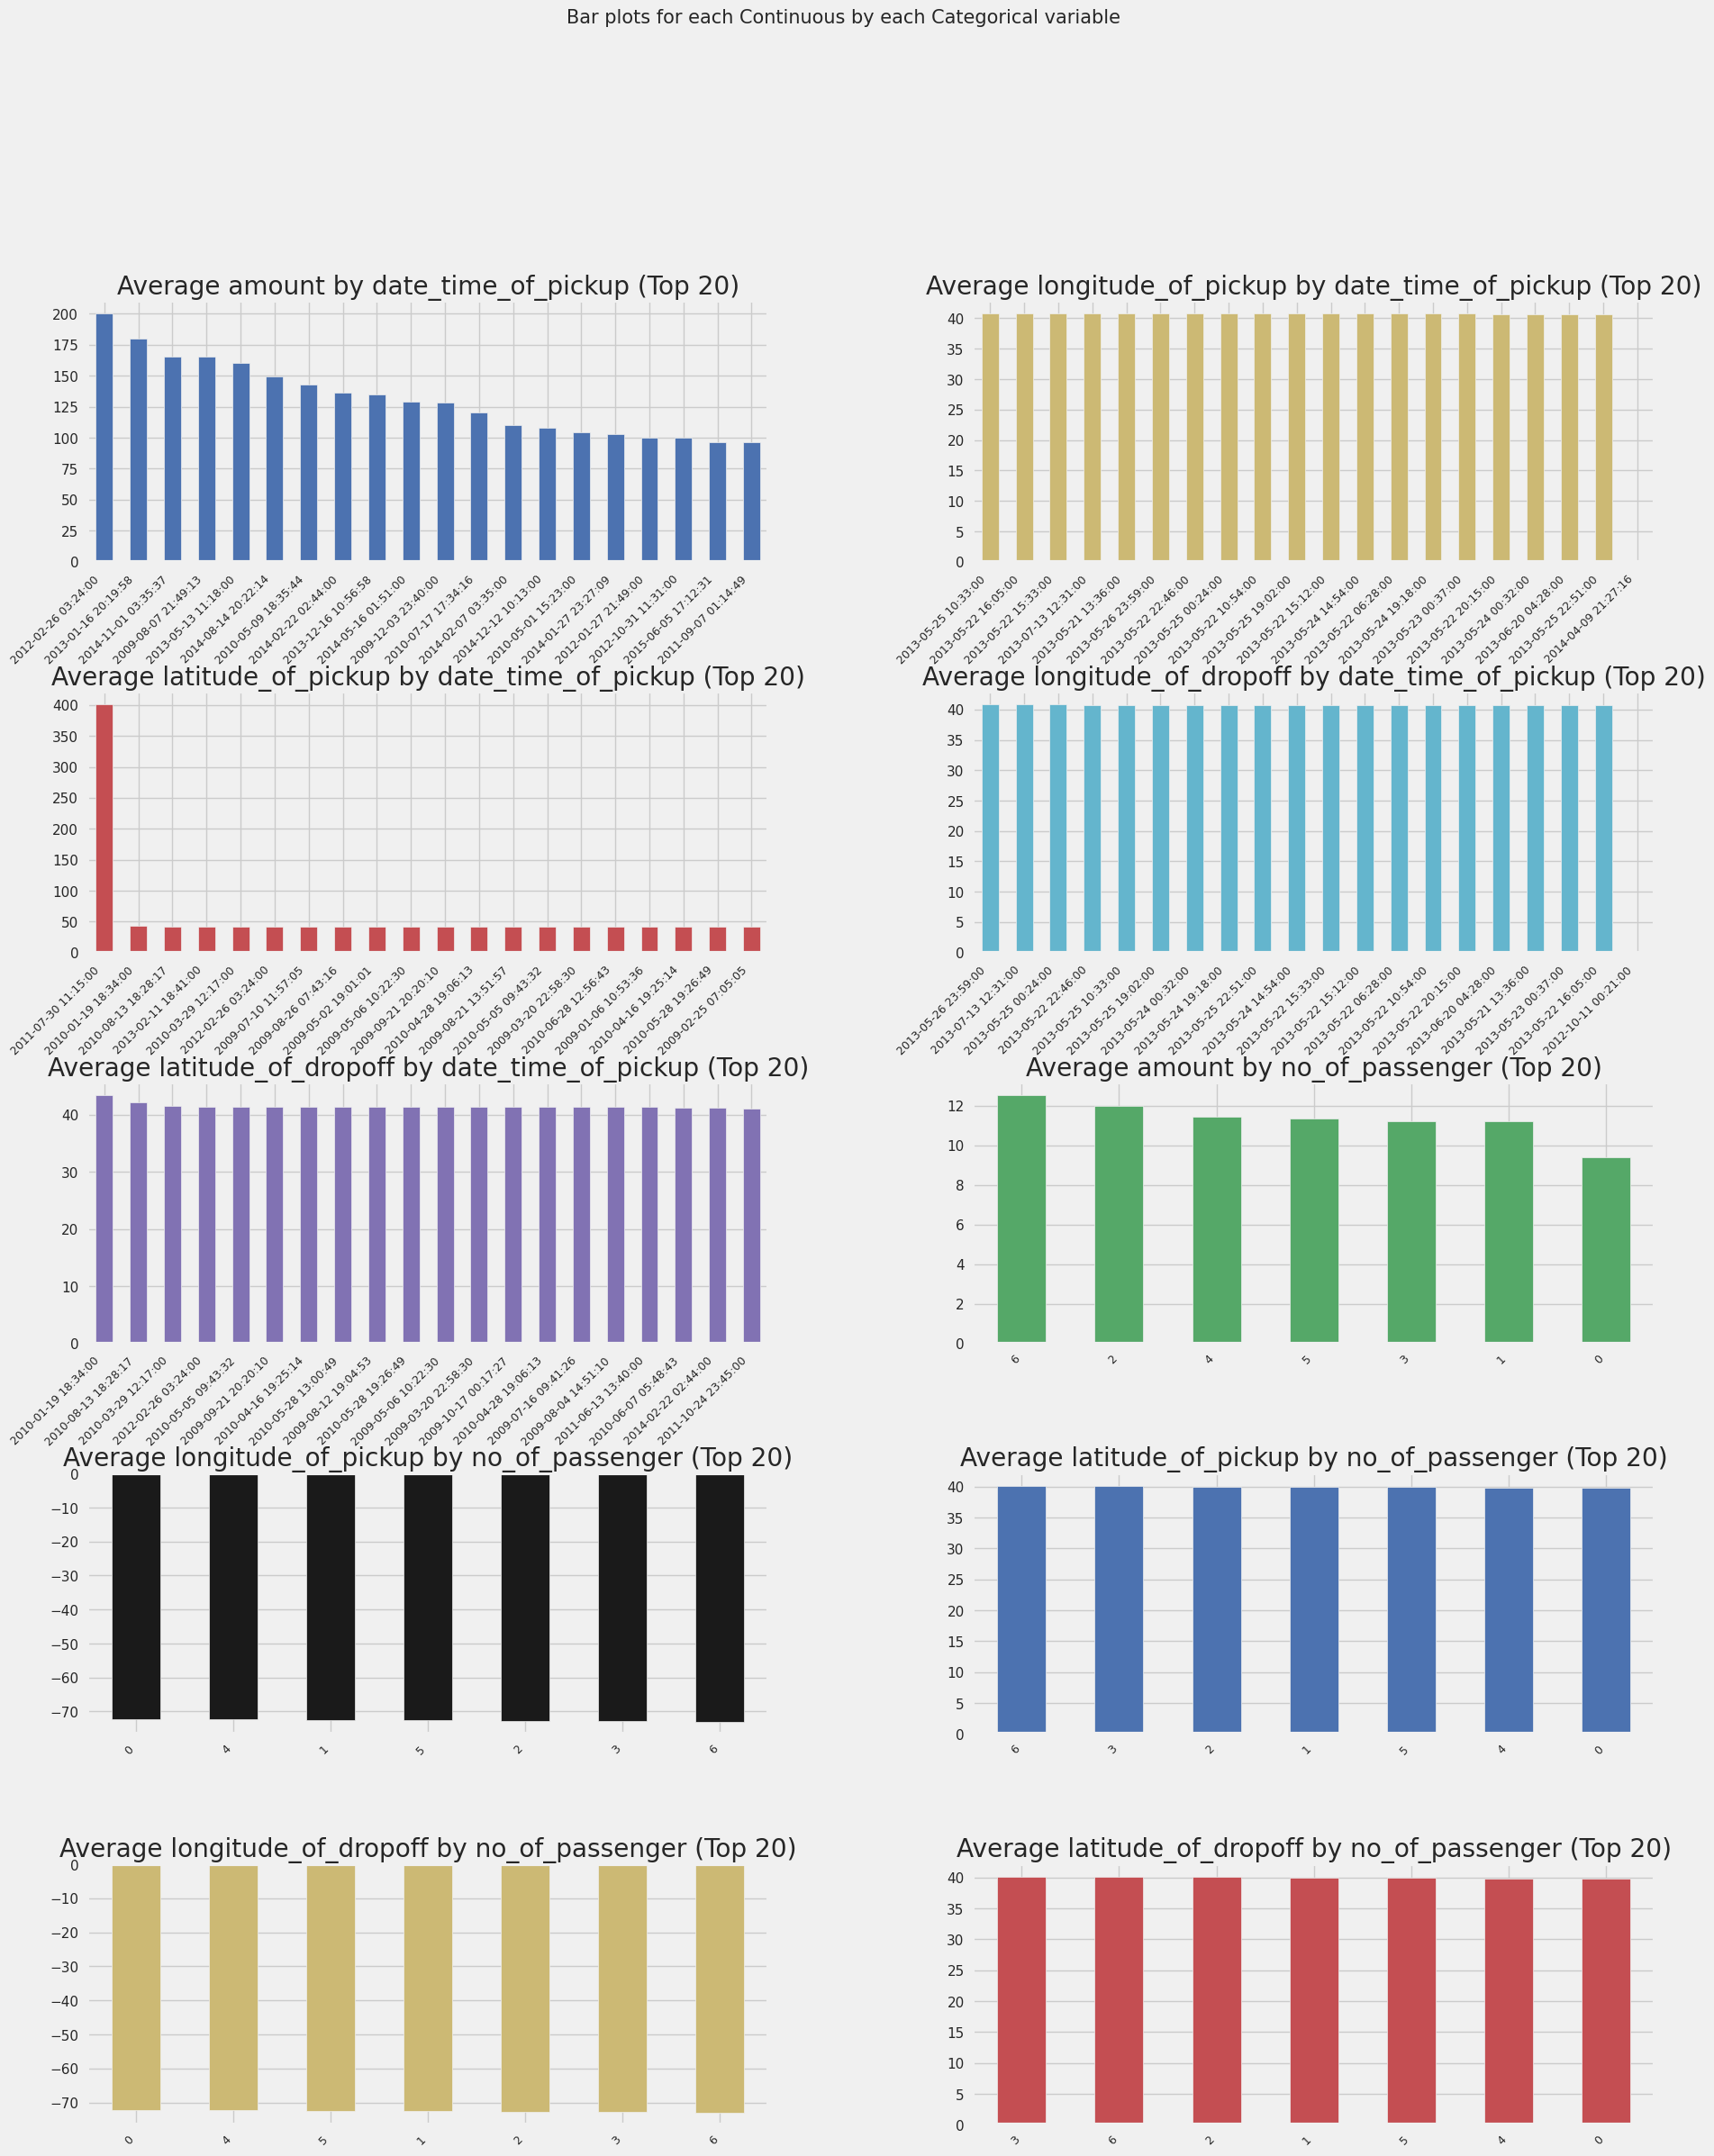

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Could not draw wordcloud plot for unique_id
All Plots done
Time to run AutoViz = 55 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


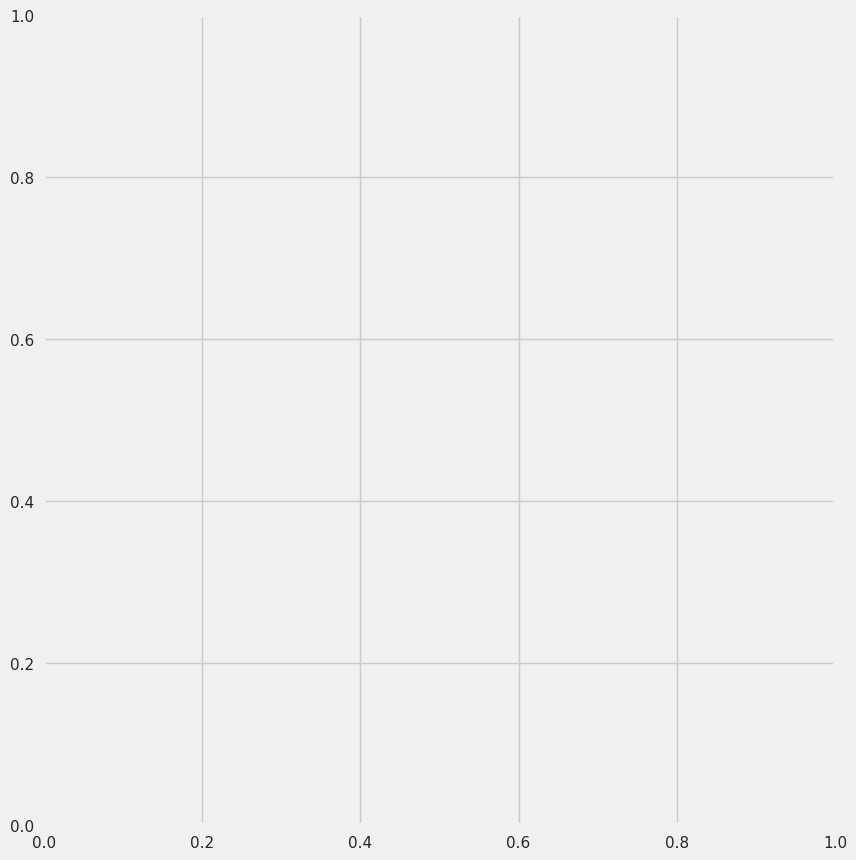

In [22]:
filename ="/content/TaxiFare (3).csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg"
)

In [23]:
# check missing value
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
weekday                 0
hour                    0
distance                0
dtype: int64

In [24]:
df.head(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,3,9,2.353281
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,1,20,0.966733
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,2,17,2.582073
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012,0,13,0.778722
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,2,1,1.770676


### dropping the unwanted columns

In [25]:
df.head(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.242218
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,3,9,2.353281
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,1,20,0.966733
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,2,17,2.582073
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012,0,13,0.778722
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,2,1,1.770676


In [26]:
df=df.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1)

In [27]:
X=df.drop(["amount","weekday"],axis=1)
Y=df["amount"]

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### Linear Regression

In [29]:
model1=LinearRegression()

In [30]:
model1.fit(X_train,Y_train)

LinearRegression()

In [31]:
model1.score(X_train,Y_train)

0.01614769040653874

In [32]:
model1.score(X_test,Y_test)

0.016737923843574087

In [33]:
from sklearn.metrics import r2_score

Y_test_pred = model1.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 2.0%


### DecisionTreeRegressor

In [34]:
model2=DecisionTreeRegressor()

In [35]:
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [36]:
model2.score(X_train,Y_train)

1.0

In [37]:
model2.score(X_test,Y_test)

0.5827009077601061

In [38]:
from sklearn.metrics import r2_score

Y_test_pred = model2.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score,2) *100))

The accuracy of our model is 57.99999999999999%


### AdaBoostRegressor

In [39]:
model3=AdaBoostRegressor()

In [40]:
model3.fit(X_train,Y_train)

AdaBoostRegressor()

In [41]:
model3.score(X_train,Y_train)

0.5170925116332351

In [42]:
model3.score(X_test,Y_test)

0.48016785534738515

In [43]:
from sklearn.metrics import r2_score

Y_test_pred = model3.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score,2) *100))

The accuracy of our model is 48.0%


### GradientBoostingRegressor

In [44]:
model4=GradientBoostingRegressor()

In [45]:
model4.fit(X_train,Y_train)

GradientBoostingRegressor()

In [46]:
model4.score(X_train,Y_train)

0.8324053614255948

In [47]:
model4.score(X_test,Y_test)

0.7887554600354377

In [48]:
from sklearn.metrics import r2_score

Y_test_pred = model4.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score,2) *100))

The accuracy of our model is 79.0%


### RandomForestRegressor

In [49]:
model5=RandomForestRegressor()

In [50]:
model5.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
model5.score(X_train,Y_train)

0.9670478852638817

In [52]:
model5.score(X_test,Y_test)

0.757443373792789

In [53]:
from sklearn.metrics import r2_score

Y_test_pred = model5.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score,2) *100))

The accuracy of our model is 76.0%


### SVR

In [54]:
model6=SVR()

In [55]:
model6.fit(X_train,Y_train)

SVR()

In [56]:
model6.score(X_train,Y_train)

-0.08124325010679989

In [57]:
model6.score(X_test,Y_test)

-0.08827600263954771

In [58]:
from sklearn.metrics import r2_score

Y_test_pred = model6.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score,2) *100))

The accuracy of our model is -9.0%
